<a href="https://colab.research.google.com/github/dinooooooi/dinooooi/blob/main/0525%EA%B8%88%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

87p~ 95p, 105p~115p

#4. 모델 세부 설정

In [1]:
import tensorflow as tf

#케라스의 내장 데이터셋에서 mnist 데이터셋 로드
mnist=tf.keras.datasets.mnist

#load_data()로 데이터셋 로드
(x_train, y_train),(x_test, y_test)=mnist.load_data()

#로드된 데이터셋 확인
print('train set:',x_train.shape, y_train.shape)
print('test set:', x_test.shape, y_test.shape)

#데이터 정규화
x_train=x_train/x_train.max() #max:255
x_test=x_test/x_test.max() #max:255

11490434/11490434 [==============================] - 0s 0us/step
train set: (60000, 28, 28) (60000,)
test set: (10000, 28, 28) (10000,)


##4-1. 초기값 설정

In [2]:
dense=tf.keras.layers.Dense(256, activation='relu')
dense.get_config()['kernel_initializer']

{'module': 'keras.initializers',
 'class_name': 'GlorotUniform',
 'config': {'seed': None},
 'registered_name': None}

In [3]:
#문자열 초기화
dense=tf.keras.layers.Dense(256, kernel_initializer='he_normal',activation='relu')
print(dense.get_config()['kernel_initializer'])

#클래스 인스턴스 초기화
he_normal=tf.keras.initializers.HeNormal()
dense=tf.keras.layers.Dense(256,kernel_initializer=he_normal,activation='relu')

{'module': 'keras.initializers', 'class_name': 'HeNormal', 'config': {'seed': None}, 'registered_name': None}


##4-2. 규제

In [4]:
#기본값
dense=tf.keras.layers.Dense(256, activation='relu')
dense.get_config()

{'name': 'dense_3',
 'trainable': True,
 'dtype': 'float32',
 'units': 256,
 'activation': 'relu',
 'use_bias': True,
 'kernel_initializer': {'module': 'keras.initializers',
  'class_name': 'GlorotUniform',
  'config': {'seed': None},
  'registered_name': None},
 'bias_initializer': {'module': 'keras.initializers',
  'class_name': 'Zeros',
  'config': {},
  'registered_name': None},
 'kernel_regularizer': None,
 'bias_regularizer': None,
 'activity_regularizer': None,
 'kernel_constraint': None,
 'bias_constraint': None}

In [5]:
#l1 규제 적용
dense=tf.keras.layers.Dense(256, kernel_regularizer=' l1', activation='relu')
print(dense.get_config()['kernel_regularizer'])

#클래스 인스턴스 적용, alpha=0.1 변경
regularizer=tf.keras.regularizers.l1(l1=0.1)
dense=tf.keras.layers.Dense(256,kernel_regularizer=regularizer,activation='relu')
print(dense.get_config()['kernel_regularizer'])

 l1
{'module': 'keras.regularizers', 'class_name': 'L1', 'config': {'l1': 0.10000000149011612}, 'registered_name': None}


/usr/local/lib/python3.10/dist-packages/keras/src/regularizers.py:426: UserWarning: The `keras.regularizers.serialize()` API should only be used for objects of type `keras.regularizers.Regularizer`. Found an instance of type <class 'str'>, which may lead to improper serialization.
  warnings.warn(


##4-3. 드롭아웃

In [6]:
#Dropout 25% 비율 적용(25%의 노드가 삭제)
tf.keras.layers.Dropout(0.25)

##4-4. 배치 정규화

In [7]:
#Model A: Dense+ReLU
model_a=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model_a.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                50240     
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 10)                330       
                                                                 
Total params: 52650 (205.66 KB)
Trainable params: 52650 (205.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
#Model B: Dense + BatchNorm + ReLU
model_b=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(64),
    #배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    #배치 정규화 후 활성화 함수 적용
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Dense(32),
    #배치 정규화 적용
    tf.keras.layers.BatchNormalization(),
    #배치 정규화 후 활성화 함수 적용
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Dense(10, activation='softmax')
])
model_b.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 64)                50240     
                                                                 
 batch_normalization (Batch  (None, 64)                256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_1 (Bat  (None, 32)                128       
 chNormalization)                                     

##4-5. 활성화(activation) 함수

In [9]:
#LeakyReLU 기본 설정
tf.keras.layers.LeakyReLU()

#LeakyReLU.alpha=0.2로 변경
tf.keras.layers.LeakyReLU(alpha=0.2)

In [11]:
#Model C: Dense+BatchNorm + LeakyReLU(0.2)
model_c=tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(64),
        #배치 정규화 적용
        tf.keras.layers.BatchNormalization(),
        #LeakyReLU alpha=0.2 적용
        tf.keras.layers.LeakyReLU(alpha=0.2),

        tf.keras.layers.Dense(32),
        #배치 정규화 적용
        tf.keras.layers.BatchNormalization(),
        #LeakyReLU alpha=0.2 적용
        tf.keras.layers.LeakyReLU(alpha=0.2),

        tf.keras.layers.Dense(10, activation='softmax')
])

#모델요약
model_c.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_15 (Dense)            (None, 64)                50240     
                                                                 
 batch_normalization_4 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 64)                0         
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_5 (Bat  (None, 32)                128       
 chNormalization)                                     

In [12]:
model_a.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_b.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_c.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model A: Dense + ReLU
history_a=model_a.fit(x_train, y_train,
                      validation_data=(x_test,y_test),
                      epochs=10)

# Model B: Dense +BatchNorm+ReLU
history_b=model_b.fit(x_train, y_train,
                      validation_data=(x_test,y_test),
                      epochs=10)

# Model C: Dense+BatchNorm+ LeakyReLU(0.2)
history_c=model_c.fit(x_train, y_train,
                      validation_data=(x_test,y_test),
                      epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3089 - accuracy: 0.9109 - val_loss: 0.1750 - val_accuracy: 0.9469
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1395 - accuracy: 0.9577 - val_loss: 0.1196 - val_accuracy: 0.9643
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0990 - accuracy: 0.9701 - val_loss: 0.1063 - val_accuracy: 0.9674
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0780 - accuracy: 0.9761 - val_loss: 0.0909 - val_accuracy: 0.9725
Epoch 5/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0650 - accuracy: 0.9796 - val_loss: 0.0983 - val_accuracy: 0.9690
Epoch 6/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0526 - accuracy: 0.9834 - val_loss: 0.1045 - val_accuracy: 0.9688
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0463 - accuracy: 0.9851 - val_loss: 0.0889 - val_accurac

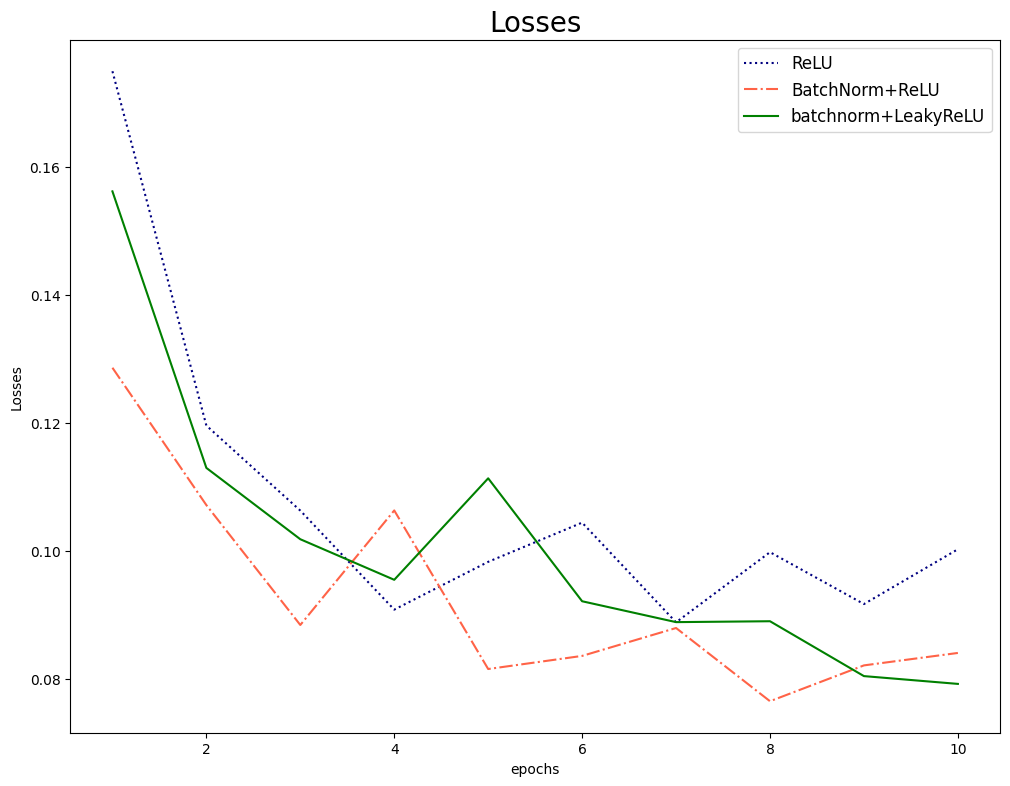

In [13]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12,9))
plt.plot(np.arange(1,11),history_a.history['val_loss'],color='navy', linestyle=':')
plt.plot(np.arange(1,11),history_b.history['val_loss'],color='tomato', linestyle='-.')
plt.plot(np.arange(1,11),history_c.history['val_loss'],color='green', linestyle='-')

plt.title('Losses',fontsize=20)
plt.xlabel('epochs')
plt.ylabel('Losses')
plt.legend(['ReLU','BatchNorm+ReLU','batchnorm+LeakyReLU'],fontsize=12)
plt.show()

#6. 모델 저장 및 불러오기

In [ ]:
import tensorflow as tf

#케라스의 내장 데이터셋에서 mnist 데이터셋 로드
mnist=tf.keras.datasets.mnist



##6-1. 모델을 파일로 저장

In [14]:
#모델을 h5 포맷으로 저장
model_c.save("h5-model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


##6-2. 저장된 모델 복원

In [15]:
#모델복원
h5_model = tf.keras.models.load_model("h5-model.h5")
h5_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_15 (Dense)            (None, 64)                50240     
                                                                 
 batch_normalization_4 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 64)                0         
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_5 (Bat  (None, 32)                128       
 chNormalization)                                     

In [16]:
#모델 검증
loss,acc = h5_model.evaluate(x_test, y_test, verbose=0)
print(f'h5model]loss:{loss:5f},acc:{acc:5f}')

h5model]loss:0.079256,acc:0.975900


In [17]:
#모델을 SavedModel 포맷으로 저장
model_c.save('saved-model')

In [18]:
#모델 복원
saved_model=tf.keras.models.load_model('saved-model')
saved_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_15 (Dense)            (None, 64)                50240     
                                                                 
 batch_normalization_4 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 64)                0         
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_5 (Bat  (None, 32)                128       
 chNormalization)                                     

In [19]:
#모델 검증(HDF5 포맷)
loss,acc=h5_model.evaluate(x_test, y_test, verbose=0)
print(f'h5model]loss:{loss:5f},acc:{acc:5f}')

#모델 검증(SavedModel 포맷)
loss,acc=saved_model.evaluate(x_test, y_test, verbose=0)
print(f'saved_model]loss:{loss:5f},acc:{acc:5f}')

h5model]loss:0.079256,acc:0.975900
saved_model]loss:0.079256,acc:0.975900


#7. 복잡한 모델 생성
##7-1. 함수형 API(Functional API)

In [ ]:
import tensorflow as tf

#케라스의 내장 데이터셋에서 mnist 데이터셋 로드
mnist=tf.keras.datasets.mnist


In [20]:
#모델의 레이어를 체인 구조로 연결 Input 레이어 정의
input_layer=tf.keras.Input(shape=(28,28),name='InputLayer')

#모델의 레이어를 체인 구조로 연결
x1=tf.keras.layers.Flatten(name='Flatten')(input_layer)
x2=tf.keras.layers.Dense(256, activation='relu',name='Dense1')(x1)
x3=tf.keras.layers.Dense(64, activation='relu',name='Dense2')(x2)
x4=tf.keras.layers.Dense(10, activation='softmax',name='OutputLayer')(x3)

In [21]:
#모델 생성
func_model=tf.keras.Model(inputs=input_layer,outputs=x4, name='FunctionalModel')

#모델 요약
func_model.summary()

Model: "FunctionalModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (InputLayer)     [(None, 28, 28)]          0         
                                                                 
 Flatten (Flatten)           (None, 784)               0         
                                                                 
 Dense1 (Dense)              (None, 256)               200960    
                                                                 
 Dense2 (Dense)              (None, 64)                16448     
                                                                 
 OutputLayer (Dense)         (None, 10)                650       
                                                                 
Total params: 218058 (851.79 KB)
Trainable params: 218058 (851.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


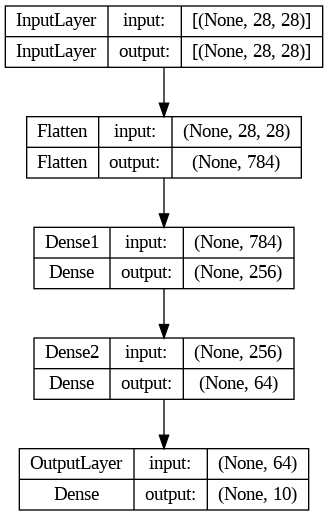

In [22]:
from tensorflow.keras.utils import plot_model

#구조도 시각화
plot_model(func_model, show_shapes=True, show_layer_names=True, to_file='model.png')

In [23]:
#컴파일
func_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

#훈련
func_model.fit(x_train, y_train, epochs=3)

#검증
loss,acc=func_model.evaluate(x_test, y_test, verbose=0)
print(f'Functional Model]loss:{loss:5f},acc:{acc:5f}')

Epoch 1/3
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2144 - accuracy: 0.9373
Epoch 2/3
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0885 - accuracy: 0.9728
Epoch 3/3
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0599 - accuracy: 0.9812
Functional Model]loss:0.079353,acc:0.976600


##7-2. 모델 서브클래싱(Model Subclassing)

In [24]:
class MyModel(tf.keras.Model):
    def __init__(self, units, num_classes):
        super(MyModel,self).__init__()
        #초기값 설정
        self.flatten = tf.keras.layers.Flatten()
        self.dense1 = tf.keras.layers.Dense(units,activation="relu")
        self.dense2 = tf.keras.layers.Dense(units/4,activation="relu")
        self.dense3 = tf.keras.layers.Dense(num_classes,activation="softmax")

    # method overiding
    # 훈련용 함수 정의
    # x는 input
    def call(self,x):
        x = self.flatten(x)
        x = self.dense1(x)
        x = self.dense2(x)
        x = self.dense3(x)
        return x

In [27]:
# 모델 생성
mymodel = MyModel(256,10)

#모델의 이름 설정
mymodel._name = 'subclass_model'

# 모델 input 정의
mymodel(tf.keras.layers.Input(shape=(28,28)))

# 모델 요약
mymodel.summary()

Model: "subclass_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         multiple                  0         
                                                                 
 dense_21 (Dense)            multiple                  200960    
                                                                 
 dense_22 (Dense)            multiple                  16448     
                                                                 
 dense_23 (Dense)            multiple                  650       
                                                                 
Total params: 218058 (851.79 KB)
Trainable params: 218058 (851.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
#컴파일
mymodel.compile(optimizer="adam", loss="sparse_categorical_crossentropy",metrics=["accuracy"])

#훈련
mymodel.fit(x_train,y_train, epochs=3)

#검증
loss, acc = mymodel.evaluate(x_test,y_test,verbose=0)
print(f"Subclassing Model w.parameters]loss:{loss:.5f}.acc:{acc:.5f}")

Epoch 1/3
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2134 - accuracy: 0.9360
Epoch 2/3
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0884 - accuracy: 0.9722
Epoch 3/3
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0599 - accuracy: 0.9809
Subclassing Model w.parameters]loss:0.08756.acc:0.97200


##7-3. 서브클래싱 모델 파라미터를 활용한 생성

In [29]:
class Mymodel(tf.keras.Model):

  #생성자 파라미터 추가
  def __init__(self,units,num_classes):
    super(Mymodel,self).__init__()
    #초기값 설정
    self.flatten = tf.keras.layers.Flatten()
    self.dense1 = tf.keras.layers.Dense(units,activation="relu")
    self.dense2 = tf.keras.layers.Dense(units/4,activation="relu")
    self.dense3 = tf.keras.layers.Dense(num_classes,activation="softmax")

  #class overiding
  #훈련용 함수 정의
  #x는 input
  def call(self,x):
    x = self.flatten(x)
    x = self.dense1(x)
    x = self.dense2(x)
    x = self.dense3(x)
    return x

In [30]:
#모델 생성
mymodel = Mymodel(256,10)

#모델 input 정의
mymodel(tf.keras.layers.Input(shape=(28,28)))

#모델 요약
mymodel.summary()

Model: "mymodel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         multiple                  0         
                                                                 
 dense_24 (Dense)            multiple                  200960    
                                                                 
 dense_25 (Dense)            multiple                  16448     
                                                                 
 dense_26 (Dense)            multiple                  650       
                                                                 
Total params: 218058 (851.79 KB)
Trainable params: 218058 (851.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
#컴파일
mymodel.compile(optimizer="adam", loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])

#훈련
mymodel.fit(x_train,y_train, epochs=3)

#검증
loss, acc = mymodel.evaluate(x_test,y_test,verbose=0)
print(f"Subclassing Model w.parameters]loss:{loss:.5f}.acc:{acc:.5f}")

Epoch 1/3
1875/1875 [==============================] - 9s 4ms/step - loss: 0.0474 - accuracy: 0.9849
Epoch 2/3
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0356 - accuracy: 0.9886
Epoch 3/3
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0301 - accuracy: 0.9900
Subclassing Model w.parameters]loss:0.07918.acc:0.97840
